# Arbre de décision avec Scikit Learn : données du Titanic

Nous cherchons ici à créer un arbre de classification des survivants/morts du naufrage du Titanic.

http://scikit-learn.org/stable/modules/tree.html#tree

In [2]:
import pandas as pd
from sklearn import tree
from sklearn.metrics import confusion_matrix
import graphviz # pour les graphiques

## Données

In [3]:
# Chargement des données
train = pd.read_csv("titanic_train.csv")
test = pd.read_csv("titanic_test.csv")

print("train:\n", train.head(), "\n")
print("types des variables de train:\n", train.dtypes, "\n")

print("test:\n",test.head(), "\n")
print("types des variables de test:\n", test.dtypes, "\n")

train:
    PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN      

### Création des jeux de données

In [4]:
# Création des jeux de données
features = ["Pclass", "Sex", "Age"]
target = ["Survived"]

train_features = train[features]
train_target = train[target]

test_features = test[features]
test_target = test[target]

# Conversion des modalités de Sex en valeurs numériques
modalites = {"Sex": {"female": 1, "male": 2}}
train_features = train_features.replace(modalites, inplace=False)
test_features = test_features.replace(modalites, inplace=False)

print("train_features:\n", test_features.head(), "\n")
print("train_target:\n", test_target.head(), "\n")
print("test_features:\n", train_features.head(), "\n")
print("test_target:\n", train_target.head(), "\n")


train_features:
    Pclass  Sex   Age
0       3    2   2.0
1       3    1  15.0
2       3    1  19.0
3       3    2   4.0
4       3    2  32.0 

train_target:
    Survived
0         0
1         1
2         1
3         0
4         1 

test_features:
    Pclass  Sex   Age
0       3    2  22.0
1       1    1  38.0
2       3    1  26.0
3       1    1  35.0
4       3    2  35.0 

test_target:
    Survived
0         0
1         1
2         1
3         1
4         0 



## Arbre de décision

http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [7]:
# Arbre de décision pour une profondeur 'max_depth'
model = tree.DecisionTreeClassifier(max_depth=4, random_state=123)
model = model.fit(train_features, train_target)
print(model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')


### Graphe de l'arbre de décision

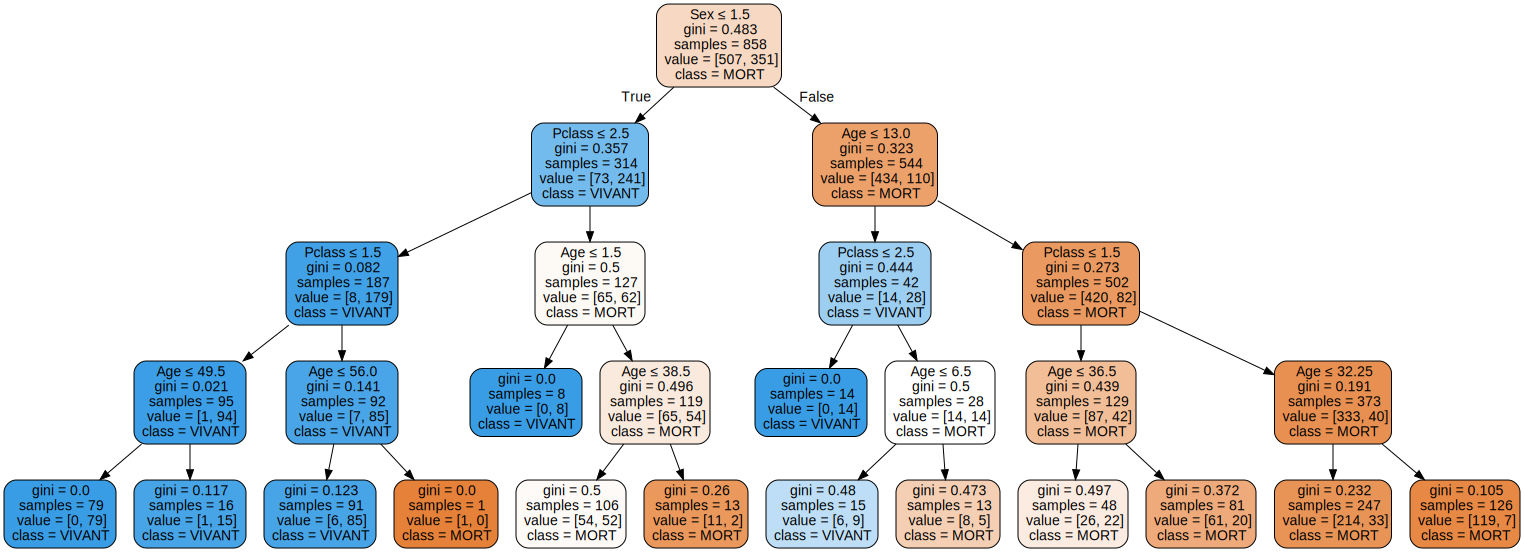

In [8]:
# Graphe de l'arbre de décision pour une profondeur 'max_depth'
dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=train_features.dtypes.index,  
                         class_names=["MORT", "VIVANT"],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

## Performance

Nous calculons maintenant la précision ('accuracy') du modèle sur le jeu de données de test à l'aide d'une matrice de confusion.

In [9]:
# Prédictions sur l'échantillon de test pour une profondeur 'max_depth'
pred = model.predict(X=test_features)
print("Prédictions sur l'échantillon de test :\n", pred, "\n")

# Matrice de confusion
conf_mat = confusion_matrix(y_pred=pred, y_true=test_target)
print("Matrice de confusion :\n", conf_mat, "\n")

# Calcul de la précision ('accuracy') pour une profondeur 'max_depth'
precision = (conf_mat[0,0] + conf_mat[1,1]) / len(pred)
print("Précision ('accuracy') = {0:3.2f}%".format(precision * 100))

Prédictions sur l'échantillon de test :
 [1 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1
 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0
 0] 

Matrice de confusion :
 [[65  4]
 [20 23]] 

Précision ('accuracy') = 78.57%


# Illustration du dilemme biais-variance

http://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

https://docs.scipy.org/doc/numpy-1.10.0/index.html

https://matplotlib.org/index.html

In [10]:
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

In [11]:
# Niveau de complexité de l'arbre
complexity_level = list(range(1,51))
print(complexity_level)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


In [12]:
train_accuracies = []
test_accuracies = []
for level in complexity_level:
    train_accuracy = 0
    model = tree.DecisionTreeClassifier(max_depth=level, random_state=123)
    model = model.fit(train_features, train_target)
    train_pred = model.predict(X=train_features)
    test_pred = model.predict(X=test_features)
    train_accuracies.append(accuracy_score(y_true=train_target, y_pred=train_pred))
    test_accuracies.append(accuracy_score(y_true=test_target, y_pred=test_pred))

train_accuracies = np.array(train_accuracies)
#print(train_accuracies)
train_errors = 1.0 - train_accuracies
#print(train_errors)
test_accuracies = np.array(test_accuracies)
#print(test_accuracies)
test_errors = 1.0 - test_accuracies
#print(test_errors)

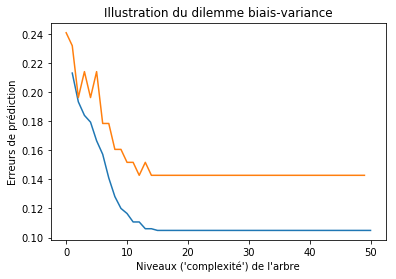

In [13]:
plt.plot(complexity_level, train_errors, test_errors)
plt.xlabel("Niveaux ('complexité') de l'arbre")
plt.ylabel('Erreurs de prédiction')
plt.title('Illustration du dilemme biais-variance')
plt.show()